In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

# Load dataset
data = pd.read_csv("New Dataframe.csv")

# Separate features (X) and target (y)
X = data.drop(columns=['Target'])
y = data['Target']

# Split data: train (65%), validation (20%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42) # 0.4286 x 0.35 ≈ 0.15

# Initialize and train KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)

# Calculate metrics
metrics = {
    "R²": [r2_score(y_val, y_val_pred), r2_score(y_test, y_test_pred)],
    "MedAE": [median_absolute_error(y_val, y_val_pred), median_absolute_error(y_test, y_test_pred)],
    "MAE": [mean_absolute_error(y_val, y_val_pred), mean_absolute_error(y_test, y_test_pred)]
}

# Display metrics with 2 decimal precision
for metric, values in metrics.items():
    print(f"{metric} - Validation: {values[0]:.2f}, Test: {values[1]:.2f}")

R² - Validation: -0.54, Test: 0.23
MedAE - Validation: 192.00, Test: 166.00
MAE - Validation: 214.58, Test: 163.86


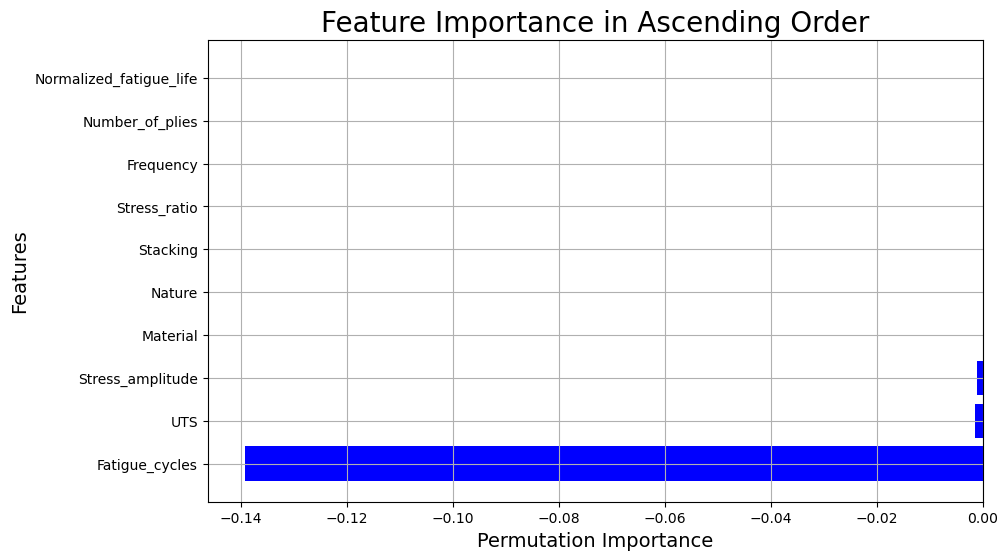

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(knn, X_val, y_val, n_repeats=30, random_state=42)

# Get sorted indices of feature importance
sorted_idx = perm_importance.importances_mean.argsort()
feature_names = X.columns[sorted_idx]
importance_values = perm_importance.importances_mean[sorted_idx]

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_values, color="blue")
plt.xlabel("Permutation Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance in Ascending Order", fontsize=20)
plt.grid(True)

# Save the plot as an image
#plt.savefig('KNN.tiff')

# Show plot
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

# Load dataset
data = pd.read_csv("New Dataframe.csv")

# Separate features (X) and target (y)
X = data.drop(columns=['Target'])
y = data['Target']

# Split data: train (65%), validation (20%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan and Euclidean distances
}

# Initialize and perform GridSearchCV with 5 folds
knn = KNeighborsRegressor()
knn.GS = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1)
knn.GS.fit(X_train, y_train)

# Extract best parameters and CV R²
best_params = knn.GS.best_params_
cv_r2 = knn.GS.best_score_

print(f"Best Parameters: {best_params}")
print(f"Cross-Validation R²: {cv_r2:.2f}")

# Predict on validation and test sets using the best model
y_val_pred = knn.GS.predict(X_val)
y_test_pred_gs = knn.GS.predict(X_test)

# Calculate metrics for validation and test sets
metrics = {
    "R²": [r2_score(y_val, y_val_pred), r2_score(y_test, y_test_pred_gs)],
    "MedAE": [median_absolute_error(y_val, y_val_pred), median_absolute_error(y_test, y_test_pred_gs)],
    "MAE": [mean_absolute_error(y_val, y_val_pred), mean_absolute_error(y_test, y_test_pred_gs)]
}

# Display metrics with 2 decimal precision
for metric, values in metrics.items():
    print(f"{metric} - Validation: {values[0]:.2f}, Test: {values[1]:.2f}")

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Cross-Validation R²: 0.20
R² - Validation: -0.12, Test: 0.20
MedAE - Validation: 113.72, Test: 154.59
MAE - Validation: 167.21, Test: 160.94


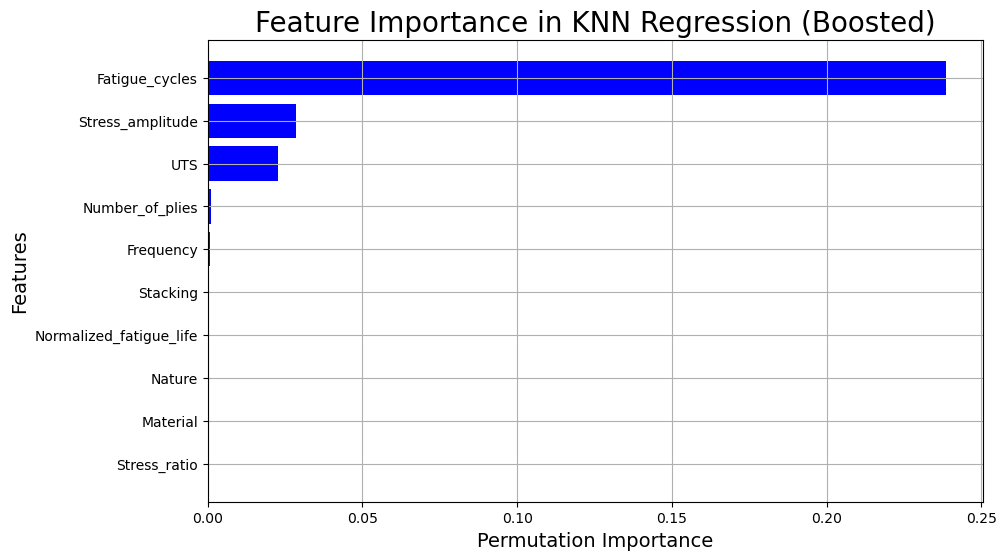

In [12]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the best KNN model from GridSearchCV
perm_importance = permutation_importance(knn.GS, X_val, y_val, n_repeats=30, random_state=42)

# Sort feature importance values in ascending order
sorted_idx = perm_importance.importances_mean.argsort()
feature_names = X.columns[sorted_idx]
importance_values = perm_importance.importances_mean[sorted_idx]

# Plotting feature importance in ascending order
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_values, color="blue")
plt.xlabel("Permutation Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance in KNN Regression (Boosted)", fontsize=20)
plt.grid(True)

# Save the plot as an image
#plt.savefig('KNN GS.tiff')

# Show plot
plt.show()

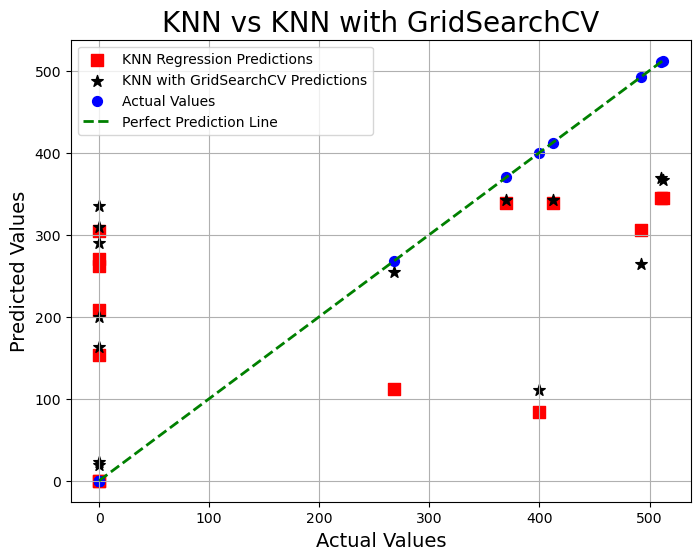

In [16]:
# Set figure size
plt.figure(figsize=(8, 6))

# Actual vs RR predictions (Square markers, blue color)
plt.scatter(y_test, y_test_pred, marker='s', color='red', s=75, label="KNN Regression Predictions")

# Actual vs RR_GridSearchCV predictions (Triangle markers, orange color)
plt.scatter(y_test, y_test_pred_gs, marker='*', color='black', s=75, label="KNN with GridSearchCV Predictions")

# Actual values (Round markers, green color)
plt.scatter(y_test, y_test, marker='o', color='blue', s=50, label="Actual Values")

# Reference line (Perfect prediction line y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Adding labels and legend
plt.title("KNN vs KNN with GridSearchCV", fontsize=20)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('KNN vs KNN with gridserach.tiff')

# Show plot
plt.show()